# Kmeans clustering

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
df=pd.read_csv("Iris.csv")

In [17]:
df1=df.copy()

In [18]:
df1.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
df1.drop(columns="Species",inplace=True)

In [20]:
df1.drop(columns="Id",inplace=True)

In [21]:
df1.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
#normalization
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df1)
df1 = pd.DataFrame(data_scaled)
df1.head(5)

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [27]:
#Kmeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
kmeans.fit(df1)

KMeans(n_clusters=3)

In [28]:
kmeans.inertia_

140.965816630747

In [61]:
SSE = []
for cluster in range(1,4):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init = 'k-means++')
    kmeans.fit(df1)
    SSE.append(kmeans.inertia_)

C:\Users\Aniket kumar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Aniket kumar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Aniket kumar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Aniket kumar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.war

Text(0, 0.5, 'Inertia')

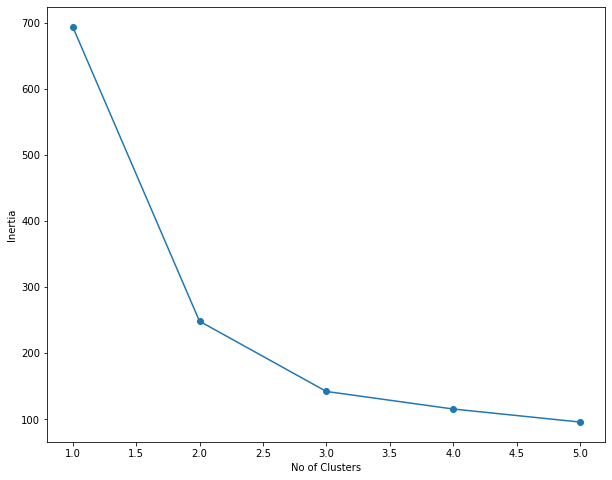

In [62]:
#elbow method

frame = pd.DataFrame({'Cluster': range(1,4), 'SSE':SSE})
plt.figure(figsize=(10,8))
plt.plot(frame['Cluster'], frame ['SSE'], marker = 'o')
plt.xlabel('No of Clusters')
plt.ylabel('Inertia')

In [58]:
#prediction
pred = kmeans.predict(df1)

In [59]:
frame = pd.DataFrame(df1)
frame['cluster'] = pred
frame['cluster'].value_counts()

1    56
0    50
2    44
Name: cluster, dtype: int64